In [136]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns

In [137]:
engine = create_engine("sqlite:///data/mta_turnstile.db")

In [138]:
all_tables = engine.table_names()
all_tables
some_tables = all_tables[4:26]
len(some_tables)

22

In [139]:
dfs = []
for table in some_tables:
    dfs.append(pd.read_sql(table,engine))
    mtadf_init = pd.concat(dfs)
mtadf_init.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2019,03:00:00,REGULAR,6922652,2347673
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2019,07:00:00,REGULAR,6922669,2347688
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2019,11:00:00,REGULAR,6922747,2347773
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2019,15:00:00,RECOVR AUD,6922932,2347849
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2019,19:00:00,REGULAR,6923237,2347911


In [140]:
# isolate line 7
mtadf_init = mtadf_init[(mtadf_init['LINENAME'].str.contains('7'))]

# NEW DF: mtadf7
- Deep copy of mtadf_init
- Only contains LINE 7

In [141]:
# deep copy the filtered df
mtadf7 = mtadf_init.copy()

In [142]:
mtadf7['DATE'] = mtadf7['DATE'].apply(pd.to_datetime)

In [143]:
# remove unwanted days in january
jan31 = mtadf7[(mtadf7.DATE.dt.month == 1) & (mtadf7.DATE.dt.day.isin([31]))]
jan31
mtadf7_nojan = mtadf7[(mtadf7.DATE.dt.month != 1)]
mtadf7_nojan
mtadf7_27 = pd.concat([jan31,mtadf7_nojan])
mtadf7_27.reset_index(inplace=True,drop=True)

In [144]:
# remove unwanted days in july
july1 = mtadf7_27[(mtadf7_27.DATE.dt.month == 7) & (mtadf7_27.DATE.dt.day.isin([1]))]
july1
mtadf7_nojuly = mtadf7_27[(mtadf7_27.DATE.dt.month != 7)]
mtadf7_nojuly
mtadf7_26 = pd.concat([mtadf7_nojuly,july1])
mtadf7_26

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,03:00:00,REGULAR,8520993,10408171
1,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,07:00:00,REGULAR,8521128,10408280
2,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,11:00:00,REGULAR,8521601,10410411
3,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,15:00:00,REGULAR,8522140,10411125
4,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,19:00:00,REGULAR,8523496,10412229
...,...,...,...,...,...,...,...,...,...,...,...
412844,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,04:00:00,REGULAR,1,26
412845,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,08:00:00,REGULAR,1,26
412846,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,12:00:00,REGULAR,1,26
412847,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,16:00:00,REGULAR,1,26


# NEW DATAFRAME: mtadf
- LINE 7 ONLY
- FEB, MARCH, APRIL, MAY, JUNE

In [145]:
# deep copy and reset df name
mtadf = mtadf7_26.copy()

In [146]:
mtadf

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,03:00:00,REGULAR,8520993,10408171
1,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,07:00:00,REGULAR,8521128,10408280
2,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,11:00:00,REGULAR,8521601,10410411
3,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,15:00:00,REGULAR,8522140,10411125
4,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,19:00:00,REGULAR,8523496,10412229
...,...,...,...,...,...,...,...,...,...,...,...
412844,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,04:00:00,REGULAR,1,26
412845,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,08:00:00,REGULAR,1,26
412846,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,12:00:00,REGULAR,1,26
412847,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,16:00:00,REGULAR,1,26


In [147]:
print('DTYPES:\n',mtadf.dtypes,'\n')
print('COLUMNS:\n',mtadf.columns,'\n')
print('NUMBER ROWS:\n', mtadf.shape[0],'\n')
# print('ROWS PER STATION:\n', mtadf.STATION.value_counts())

DTYPES:
 C/A                                                                             object
UNIT                                                                            object
SCP                                                                             object
STATION                                                                         object
LINENAME                                                                        object
DIVISION                                                                        object
DATE                                                                    datetime64[ns]
TIME                                                                            object
DESC                                                                            object
ENTRIES                                                                          int64
EXITS                                                                            int64
dtype: object 

COLUMNS:
 Index(['

In [148]:
# fix the insane amount of space after 'EXITS'
mtadf.rename(str.strip, axis='columns',inplace=True)
mtadf.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [149]:
# change DATE back to string
mtadf['DATE'] = mtadf['DATE'].dt.strftime('%m/%d/%Y')

In [150]:
# create 'OBSERVED_AT' column
mtadf['OBSERVED_AT'] = pd.to_datetime(mtadf['DATE']+ ' ' + mtadf['TIME'], 
                                      format='%m/%d/%Y %H:%M:%S')

In [151]:
# create some other columns based on the datetime object
mtadf['MONTH'] = mtadf.OBSERVED_AT.dt.month
mtadf['DAY'] = mtadf.OBSERVED_AT.dt.day

In [152]:
# create identifyer for each turnstile then drop original columns
mtadf['TURNSTILE'] = mtadf['UNIT'] + '-' + mtadf['C/A'] + '-' + mtadf['SCP']

In [153]:
mtadf.drop(['C/A','UNIT','SCP','DIVISION'],axis=1,inplace=True)

In [154]:
# check columns for drop
mtadf.columns

Index(['STATION', 'LINENAME', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS',
       'OBSERVED_AT', 'MONTH', 'DAY', 'TURNSTILE'],
      dtype='object')

In [155]:
# rearrange order of columns and check
col_names = ['STATION','TURNSTILE','OBSERVED_AT',
             'DATE','MONTH','DAY','TIME',
             'ENTRIES','EXITS',
             'LINENAME','DESC']
mtadf = mtadf.reindex(columns=col_names)
mtadf.head(1)

,STATION,TURNSTILE,OBSERVED_AT,DATE,MONTH,DAY,TIME,ENTRIES,EXITS,LINENAME,DESC
0,TIMES SQ-42 ST,R032-A021-01-00-00,2019-01-31 03:00:00,01/31/2019,1,31,03:00:00,8520993,10408171,ACENQRS1237W,REGULAR


# NEW DATAFRAME: mtadfs
- LINE 7 ONLY
- FEB, MARCH, APRIL, MAY, JUNE
- SORTED BY STATION, MONTH, DAY

In [156]:
# sort the dataframe by station, then month/day/hour/min
mtadfs = mtadf.sort_values(['STATION','MONTH','DAY'])

In [157]:
mtadfs.OBSERVED_AT.dt.hour.value_counts()
#some observations are at HOUR 0 aka midnight

8     43306
16    41165
12    40815
4     40748
20    40615
0     40436
9     13653
17    12804
13    12784
21    12561
5     12503
1     12352
7     11122
11    10816
15    10398
23    10320
19    10316
3     10269
10     2796
22     2468
18     2354
6      2198
14     2191
2      2139
Name: OBSERVED_AT, dtype: int64

In [158]:
# create an hour offset
one_hour = pd.offsets.Hour()

In [159]:
# how many rows occur from midnight to midnight:59?
print('midnight hour:', mtadfs[mtadfs.OBSERVED_AT.dt.hour == 0].shape[0])
print('all rows:', mtadfs.shape[0])

midnight hour: 40436
all rows: 401129


In [160]:
# if the observation was from midnight to midight:59
# subtract 1 hour so the log is included for the previous day
mtadfs['OBSERVED_AT'] = mtadfs['OBSERVED_AT'].apply(lambda x: x-one_hour if x.hour == 0 else x)

In [161]:
# update hour
# check if we have any instances of midnight to midnight:59
mtadfs['HOUR'] = mtadfs['OBSERVED_AT'].dt.hour
print(mtadfs[mtadfs['HOUR'] == 0])

Empty DataFrame
Columns: [STATION, TURNSTILE, OBSERVED_AT, DATE, MONTH, DAY, TIME, ENTRIES, EXITS, LINENAME, DESC, HOUR]
Index: []


# NEW DATAFRAME: mtadf_ts_daily
- LINE 7 ONLY
- FEB, MARCH, APRIL, MAY, JUNE
- SORTED BY STATION, MONTH, DAY
- CUMULATIVE DAILY VALUES PER TURNSTILE AT EACH STATION

In [162]:
# get daily cumulative # per turnstile per day
# group by turnstile -- max value of that turnstile is the max value for that day
mtadf_ts_daily = mtadfs.groupby(['TURNSTILE','STATION','DATE','LINENAME'],as_index=False)\
                        [['ENTRIES','EXITS']].max()
mtadf_ts_daily

,TURNSTILE,STATION,DATE,LINENAME,ENTRIES,EXITS
0,R010-N060-01-00-00,42 ST-PORT AUTH,01/31/2019,ACENGRS1237W,10811828,16658639
1,R010-N060-01-00-00,42 ST-PORT AUTH,02/01/2019,ACENGRS1237W,10813640,16662828
2,R010-N060-01-00-00,42 ST-PORT AUTH,02/02/2019,ACENGRS1237W,10815201,16666439
3,R010-N060-01-00-00,42 ST-PORT AUTH,02/03/2019,ACENGRS1237W,10816713,16669017
4,R010-N060-01-00-00,42 ST-PORT AUTH,02/04/2019,ACENGRS1237W,10818236,16672272
...,...,...,...,...,...,...
65563,R347-R524-00-05-01,69 ST,06/27/2019,7,883345,481980
65564,R347-R524-00-05-01,69 ST,06/28/2019,7,884257,482434
65565,R347-R524-00-05-01,69 ST,06/29/2019,7,885136,482773
65566,R347-R524-00-05-01,69 ST,06/30/2019,7,885843,483073


In [163]:
mtadf_ts_daily[['PREV_DATE','PREV_ENTRIES','PREV_EXITS']]=mtadf_ts_daily\
                            .groupby(['TURNSTILE','STATION'])[['DATE', 'ENTRIES','EXITS']]\
                            .apply(lambda grp: grp.shift(1))
mtadf_ts_daily            

,TURNSTILE,STATION,DATE,LINENAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,R010-N060-01-00-00,42 ST-PORT AUTH,01/31/2019,ACENGRS1237W,10811828,16658639,NaN,NaN,NaN
1,R010-N060-01-00-00,42 ST-PORT AUTH,02/01/2019,ACENGRS1237W,10813640,16662828,01/31/2019,10811828.0,16658639.0
2,R010-N060-01-00-00,42 ST-PORT AUTH,02/02/2019,ACENGRS1237W,10815201,16666439,02/01/2019,10813640.0,16662828.0
3,R010-N060-01-00-00,42 ST-PORT AUTH,02/03/2019,ACENGRS1237W,10816713,16669017,02/02/2019,10815201.0,16666439.0
4,R010-N060-01-00-00,42 ST-PORT AUTH,02/04/2019,ACENGRS1237W,10818236,16672272,02/03/2019,10816713.0,16669017.0
...,...,...,...,...,...,...,...,...,...
65563,R347-R524-00-05-01,69 ST,06/27/2019,7,883345,481980,06/26/2019,882415.0,481516.0
65564,R347-R524-00-05-01,69 ST,06/28/2019,7,884257,482434,06/27/2019,883345.0,481980.0
65565,R347-R524-00-05-01,69 ST,06/29/2019,7,885136,482773,06/28/2019,884257.0,482434.0
65566,R347-R524-00-05-01,69 ST,06/30/2019,7,885843,483073,06/29/2019,885136.0,482773.0


In [164]:
# drop the rows for the earliest date in the DF for each Turnstile
mtadf_ts_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [165]:
mtadf_ts_daily.shape[0]

65113

In [166]:
# how many entries are going backwards
mtadf_ts_daily[mtadf_ts_daily['ENTRIES'] < mtadf_ts_daily['PREV_ENTRIES']].shape[0]

862

In [167]:
# how many turnstiles per station
mtadf_ts_daily.groupby('STATION')['TURNSTILE'].nunique().sort_values()

STATION
74 ST-BROADWAY      5
111 ST              5
QUEENSBORO PLZ      6
40 ST LOWERY ST     6
52 ST               6
COURT SQ            8
69 ST               8
90 ST-ELMHURST      9
103 ST-CORONA       9
82 ST-JACKSON H    10
HUNTERS PT AV      10
33 ST-RAWSON ST    10
5 AVE              10
46 ST BLISS ST     12
61 ST WOODSIDE     12
JUNCTION BLVD      12
VERNON-JACKSON     13
42 ST-BRYANT PK    21
JKSN HT-ROOSVLT    22
FLUSHING-MAIN      27
34 ST-HUDSON YD    30
METS-WILLETS PT    36
TIMES SQ-42 ST     50
42 ST-PORT AUTH    51
GRD CNTRL-42 ST    67
Name: TURNSTILE, dtype: int64

In [168]:
# would be ideal if broken turnstiles just get .mean() for all the other turnstiles at that station

In [169]:
def get_daily_entries(df):
    #max_count is 30 persons per minute through the turnstile
    max_count = (30*60) * 24
    count = df['ENTRIES'] - df['PREV_ENTRIES']
    if count < 0:
        count = -count
        
    if count > max_count:
        count = min(df["ENTRIES"], df["PREV_ENTRIES"])
    
    if count > max_count:
        return 0
    return count

In [170]:
mtadf_ts_daily['NET_ENTRIES']= mtadf_ts_daily.apply(get_daily_entries, axis=1)

In [171]:
def get_daily_exits(df):
    max_count = (30*60) * 24
    count = df['EXITS'] - df['PREV_EXITS']
    if count < 0:
        count = -count
        
    if count > max_count:
        count = min(df['EXITS'], df['PREV_EXITS'])
    
    if count > max_count:
        return 0
    return count

In [172]:
mtadf_ts_daily['NET_EXITS']= mtadf_ts_daily.apply(get_daily_exits, axis=1)

In [173]:
mtadf_ts_daily

,TURNSTILE,STATION,DATE,LINENAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,NET_ENTRIES,NET_EXITS
1,R010-N060-01-00-00,42 ST-PORT AUTH,02/01/2019,ACENGRS1237W,10813640,16662828,01/31/2019,10811828.0,16658639.0,1812.0,4189.0
2,R010-N060-01-00-00,42 ST-PORT AUTH,02/02/2019,ACENGRS1237W,10815201,16666439,02/01/2019,10813640.0,16662828.0,1561.0,3611.0
3,R010-N060-01-00-00,42 ST-PORT AUTH,02/03/2019,ACENGRS1237W,10816713,16669017,02/02/2019,10815201.0,16666439.0,1512.0,2578.0
4,R010-N060-01-00-00,42 ST-PORT AUTH,02/04/2019,ACENGRS1237W,10818236,16672272,02/03/2019,10816713.0,16669017.0,1523.0,3255.0
5,R010-N060-01-00-00,42 ST-PORT AUTH,02/05/2019,ACENGRS1237W,10819830,16675854,02/04/2019,10818236.0,16672272.0,1594.0,3582.0
...,...,...,...,...,...,...,...,...,...,...,...
65563,R347-R524-00-05-01,69 ST,06/27/2019,7,883345,481980,06/26/2019,882415.0,481516.0,930.0,464.0
65564,R347-R524-00-05-01,69 ST,06/28/2019,7,884257,482434,06/27/2019,883345.0,481980.0,912.0,454.0
65565,R347-R524-00-05-01,69 ST,06/29/2019,7,885136,482773,06/28/2019,884257.0,482434.0,879.0,339.0
65566,R347-R524-00-05-01,69 ST,06/30/2019,7,885843,483073,06/29/2019,885136.0,482773.0,707.0,300.0


# NEW DATAFRAME: mtadf_st_daily
- LINE 7 ONLY
- FEB, MARCH, APRIL, MAY, JUNE
- SORTED BY STATION, MONTH, DAY
- NET DAILY ENTRY/EXIT VALUES PER STATION
- NET DAILY VOLUME PER STATION

In [174]:
# create a DF with daily # per STATION per DATE, sum the NET_ENTRIES NET_EXITS per STATION
mtadf_st_daily = mtadf_ts_daily.groupby(['STATION','DATE','LINENAME'],as_index=False)[['NET_ENTRIES','NET_EXITS']].sum()

In [175]:
# create a column for NET_BUSY
mtadf_st_daily['NET_BUSY'] = mtadf_st_daily['NET_ENTRIES'] + mtadf_st_daily['NET_EXITS']

In [176]:
# we *should* have a dataframe that shows net entries, net exits, and net busy by station by day!
mtadf_st_daily

,STATION,DATE,LINENAME,NET_ENTRIES,NET_EXITS,NET_BUSY
0,103 ST-CORONA,02/01/2019,7,19339.0,14082.0,33421.0
1,103 ST-CORONA,02/02/2019,7,13791.0,10879.0,24670.0
2,103 ST-CORONA,02/03/2019,7,9960.0,8712.0,18672.0
3,103 ST-CORONA,02/04/2019,7,19765.0,14083.0,33848.0
4,103 ST-CORONA,02/05/2019,7,19235.0,13704.0,32939.0
...,...,...,...,...,...,...
4017,VERNON-JACKSON,06/27/2019,7,14328.0,11409.0,25737.0
4018,VERNON-JACKSON,06/28/2019,7,13772.0,11111.0,24883.0
4019,VERNON-JACKSON,06/29/2019,7,8467.0,7924.0,16391.0
4020,VERNON-JACKSON,06/30/2019,7,14849.0,8794.0,23643.0


In [177]:
# put DATE back as a datetime object
mtadf_st_daily['DATE'] = pd.to_datetime(mtadf_st_daily['DATE'])

In [178]:
mtadf_st_daily.dtypes

STATION                object
DATE           datetime64[ns]
LINENAME               object
NET_ENTRIES           float64
NET_EXITS             float64
NET_BUSY              float64
dtype: object

# NEW DATAFRAME: line7_queens
- LINE 7 ONLY
- FEB, MARCH, APRIL, MAY, JUNE
- SORTED BY STATION, MONTH, DAY
- NET DAILY ENTRY/EXIT VALUES PER STATION
- NET DAILY VOLUME PER STATION
- CONTAINS 4 STATIONS: JUNCTION, 103 ST-CORONA, METS-WILLETS, 74ST-BROADWAY, 82 ST-JACKSON HEIGHTS

In [179]:
mtadf_st_daily['STATION'].unique()

array(['103 ST-CORONA', '111 ST', '33 ST-RAWSON ST', '34 ST-HUDSON YD',
       '40 ST LOWERY ST', '42 ST-BRYANT PK', '42 ST-PORT AUTH',
       '46 ST BLISS ST', '5 AVE', '52 ST', '61 ST WOODSIDE', '69 ST',
       '74 ST-BROADWAY', '82 ST-JACKSON H', '90 ST-ELMHURST', 'COURT SQ',
       'FLUSHING-MAIN', 'GRD CNTRL-42 ST', 'HUNTERS PT AV',
       'JKSN HT-ROOSVLT', 'JUNCTION BLVD', 'METS-WILLETS PT',
       'QUEENSBORO PLZ', 'TIMES SQ-42 ST', 'VERNON-JACKSON'], dtype=object)

In [180]:
line7_queens = mtadf_st_daily[mtadf_st_daily['STATION'].isin(['JUNCTION BLVD',
                                                          '103 ST-CORONA',
                                                          'METS-WILLETS PT',
                                                            '74 ST-BROADWAY',
                                                             '82 ST-JACKSON H'])]

In [181]:
line7_queens.STATION.unique()

array(['103 ST-CORONA', '74 ST-BROADWAY', '82 ST-JACKSON H',
       'JUNCTION BLVD', 'METS-WILLETS PT'], dtype=object)

In [182]:
line7 = line7_queens.copy()

# NEW DATAFRAME: line7
- LINE 7 ONLY
- FEB, MARCH, APRIL, MAY, JUNE
- SORTED BY STATION, MONTH, DAY
- NET DAILY ENTRY/EXIT VALUES PER STATION
- NET DAILY VOLUME PER STATION
- CONTAINS 4 STATIONS: JUNCTION, 103 ST-CORONA, METS-WILLETS, 74ST-BROADWAY, 82 ST-JACKSON HEIGHTS
- DEEP COPY OF line7_queens

In [183]:
line7.groupby('STATION').describe()

NET_ENTRIES                                                 \
                      count          mean           std      min       25%   
STATION                                                                      
103 ST-CORONA         144.0  18537.305556  10555.990036   6569.0  14583.00   
74 ST-BROADWAY        144.0   3076.555556   1640.838140   1615.0   2835.75   
82 ST-JACKSON H       144.0  14055.777778   7597.575118   5223.0  12256.50   
JUNCTION BLVD         144.0  20099.125000  10934.107034  10068.0  16349.50   
METS-WILLETS PT       144.0   6148.840278   6096.689668    800.0   2606.00   

                                             NET_EXITS                ...  \
                     50%       75%       max     count          mean  ...   
STATION                                                               ...   
103 ST-CORONA    19869.0  20520.00  135373.0     144.0  13679.041667  ...   
74 ST-BROADWAY    3062.0   3153.50   22187.0     144.0   4514.506944  ...   
82 ST-JACKSON H  14867.5  15375.75   98759.0     144.0  16802.923611  ...   
JUNCTION BLVD    21160.0  21845.25  142946.0     144.0  17249.930556  ...   
METS-WILLETS PT   3374.5   7079.50   30312.0     144.0   6513.791667  ...   

                                    NET_BUSY                              \
                      75%       max    count          mean           std   
STATION                                                                    
103 ST-CORONA    14857.00   99032.0    144.0  32216.347222  18085.465401   
74 ST-BROADWAY    4664.25   32219.0    144.0   7591.062500   4017.265997   
82 ST-JACKSON H  18243.25  117665.0    144.0  30858.701389  16598.019908   
JUNCTION BLVD    18407.75  126433.0    144.0  37349.055556  20524.221800   
METS-WILLETS PT   9648.75   33461.0    144.0  12662.631944  12351.654252   

                                                                 
                     min       25%      50%       75%       max  
STATION                                                          
103 ST-CORONA    13352.0  26877.00  33920.0  35385.25  234405.0  
74 ST-BROADWAY    4058.0   6997.50   7556.5   7827.00   54406.0  
82 ST-JACKSON H  11635.0  28004.25  32444.0  33524.75  216424.0  
JUNCTION BLVD    19239.0  32394.25  38478.0  40141.50  269379.0  
METS-WILLETS PT   1594.0   4881.00   6560.5  17223.50   63773.0  

[5 rows x 24 columns]

In [184]:
line7['WEEKDAY'] = line7['DATE'].dt.dayofweek

In [185]:
line7.dtypes

STATION                object
DATE           datetime64[ns]
LINENAME               object
NET_ENTRIES           float64
NET_EXITS             float64
NET_BUSY              float64
WEEKDAY                 int64
dtype: object

# VISUALIZATION 1: FEB-JUNE, TOTAL VOLUME PER DAY PER STATION

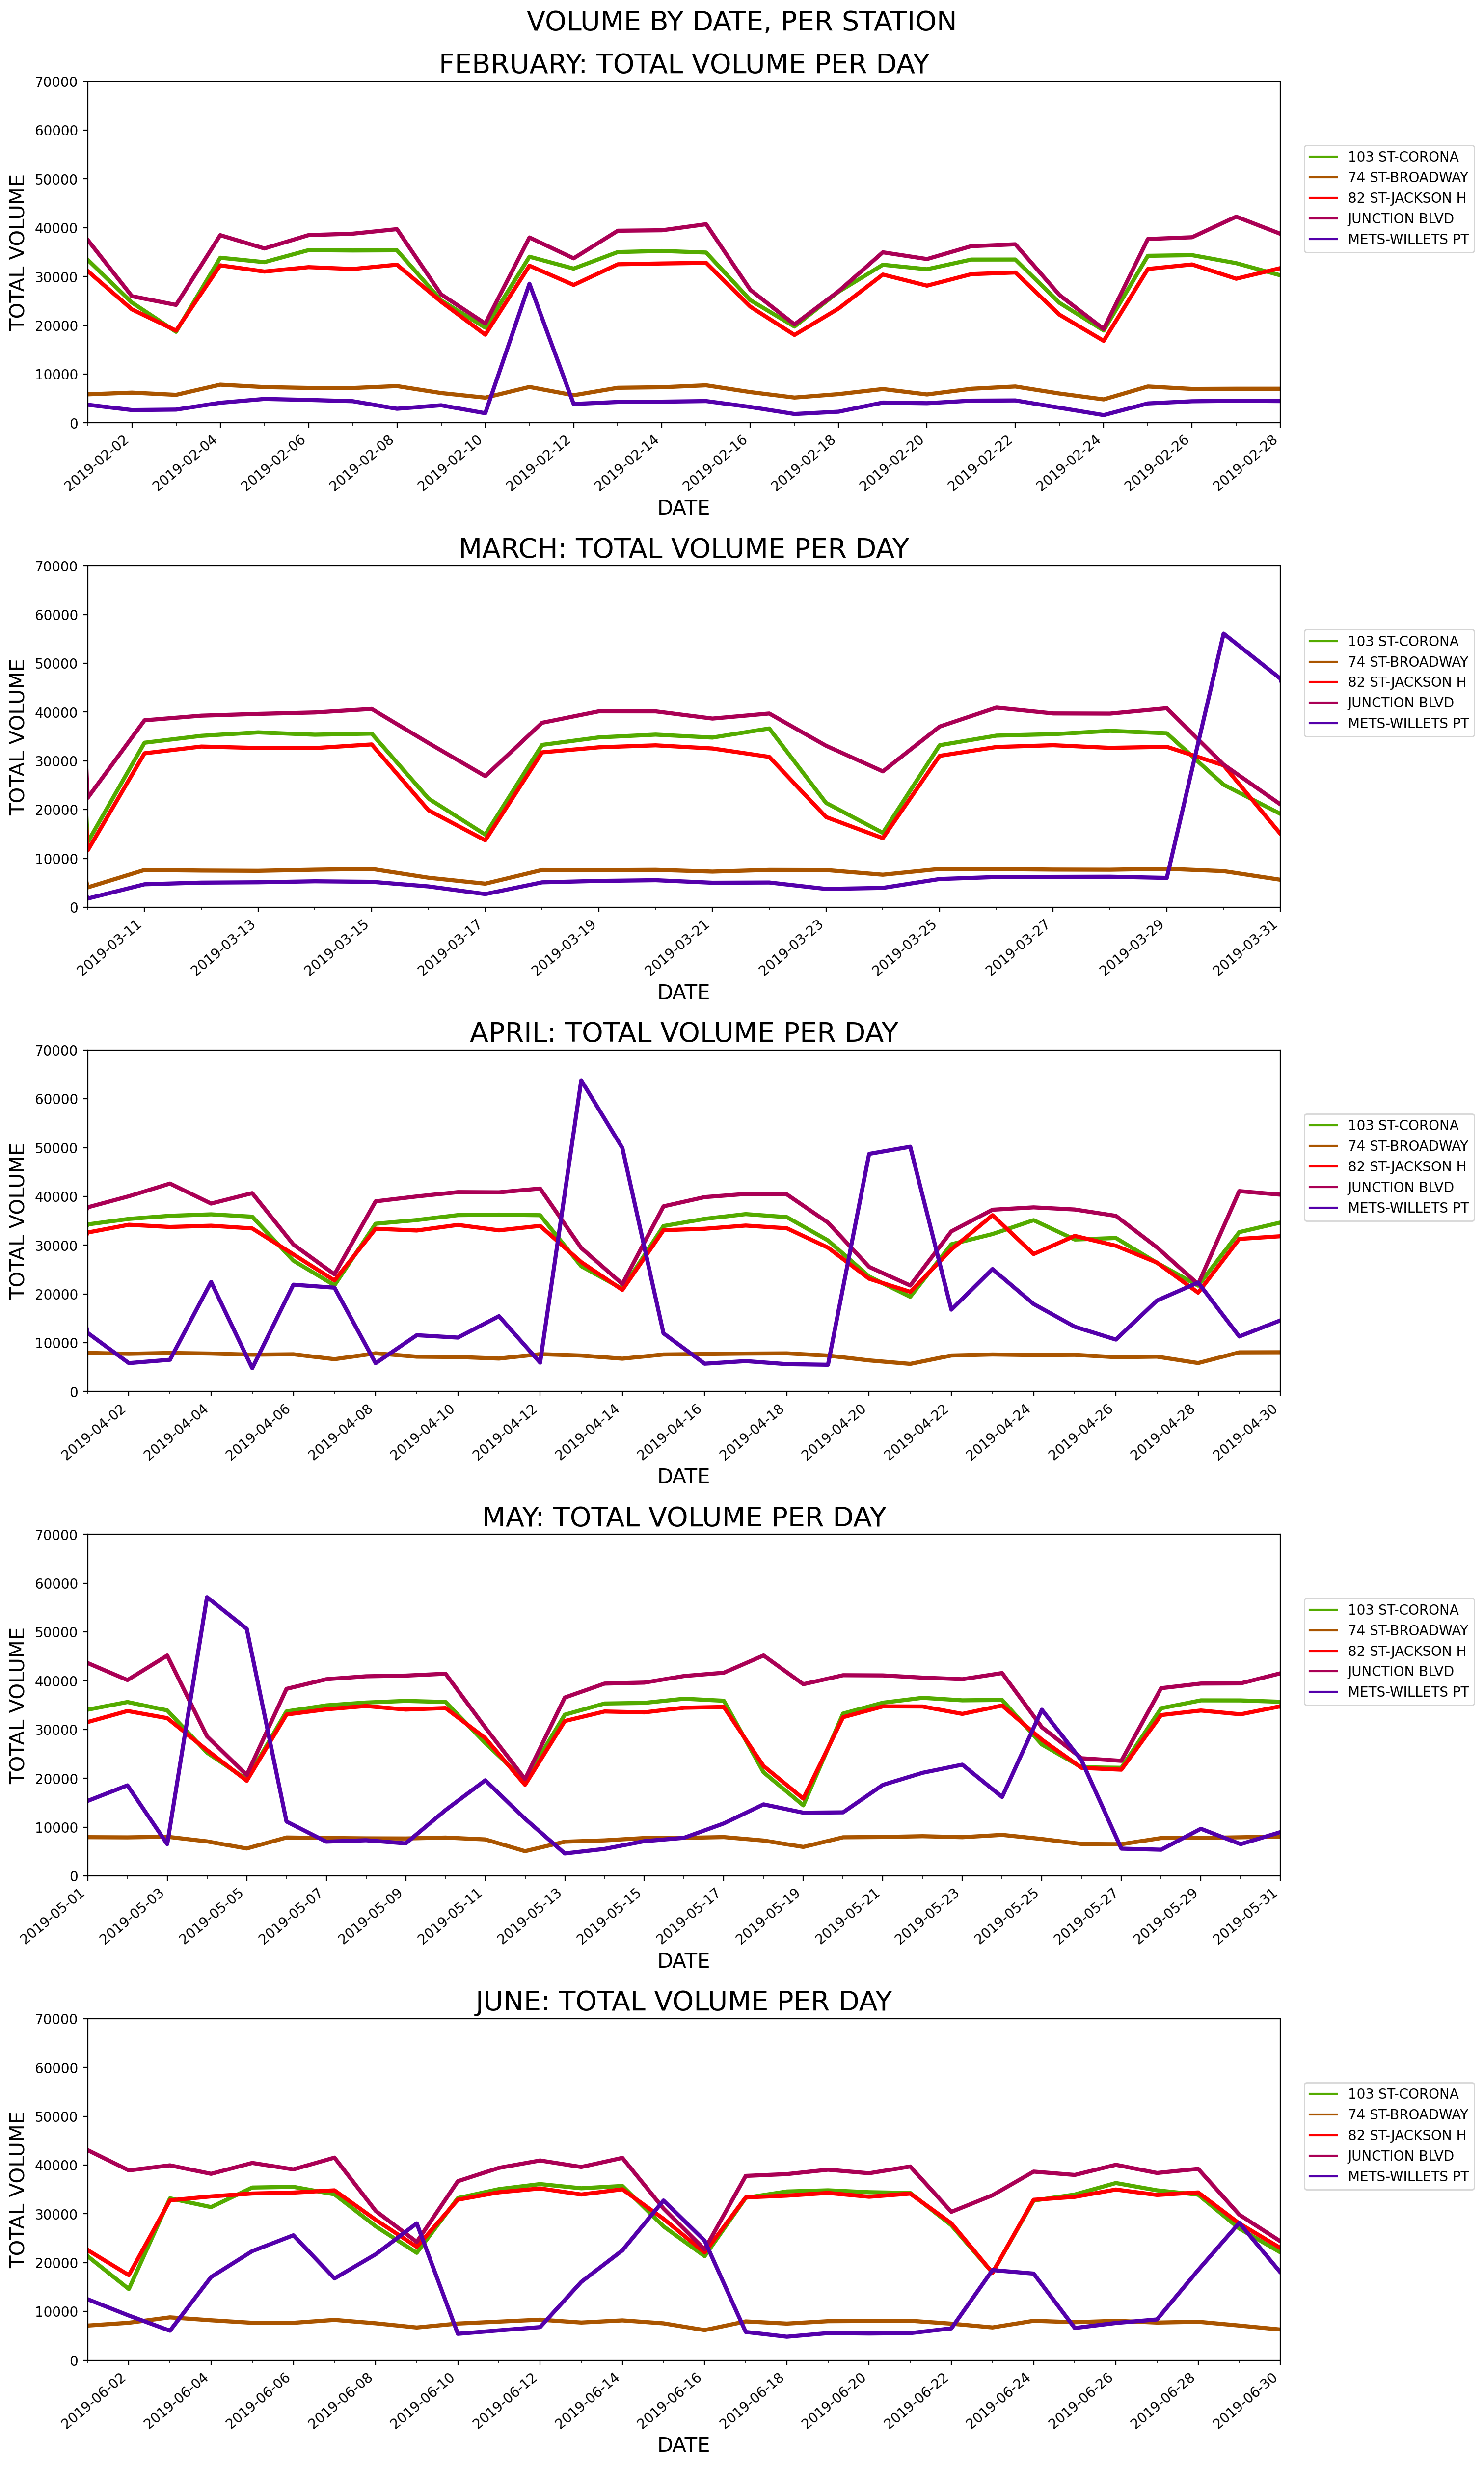

In [186]:
fig, axs = plt.subplots(5, 1, constrained_layout=True, figsize=(15, 25),dpi=200)
lims = [(np.datetime64('2019-02-01'), np.datetime64('2019-02-28')),
        (np.datetime64('2019-03-10'), np.datetime64('2019-03-31')),
        (np.datetime64('2019-04-01'), np.datetime64('2019-04-30')),
        (np.datetime64('2019-05-01'), np.datetime64('2019-05-31')),
        (np.datetime64('2019-06-01'), np.datetime64('2019-06-30'))]

fig.suptitle('VOLUME BY DATE, PER STATION',ha='center',fontsize=20)

axs[0].set_title('FEBRUARY: TOTAL VOLUME PER DAY',fontsize=20)
axs[1].set_title('MARCH: TOTAL VOLUME PER DAY',fontsize=20)
axs[2].set_title('APRIL: TOTAL VOLUME PER DAY',fontsize=20)
axs[3].set_title('MAY: TOTAL VOLUME PER DAY',fontsize=20)
axs[4].set_title('JUNE: TOTAL VOLUME PER DAY',fontsize=20)

for idx, ax in enumerate(axs):
    sns.lineplot(ax=axs[idx], x='DATE', y='NET_BUSY',data=line7,hue='STATION',palette='brg_r', lw=3)
    axs[idx].set_xlim(lims[idx])
    axs[idx].set_ylim(0,70000)
    
    axs[idx].xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    axs[idx].xaxis.set_major_locator(mdates.DayLocator(interval=2))
    axs[idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    axs[idx].legend(loc=(1.02,0.5))
    
    axs[idx].set_ylabel('TOTAL VOLUME',fontsize=15)
    axs[idx].set_xlabel('DATE',fontsize=15)
   
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

plt.savefig('per_month_allstations_volumebydate.jpg')

# NEW DATAFRAMES:
- junction
- st_corona
- broadway
- jackson
- mets_willets

- DEEP COPY OF line7 filtered DF

In [187]:
junction_s = line7[line7['STATION'] == 'JUNCTION BLVD']
junction = junction_s.reset_index().copy()

st_corona_s = line7[line7['STATION'] == '103 ST-CORONA']
st_corona = st_corona_s.copy()

broadway_s = line7[line7['STATION'] == '74 ST-BROADWAY']
broadway = broadway_s.copy()

jackson_s = line7[line7['STATION'] == '82 ST-JACKSON H']
jackson = jackson_s.copy()

mets_willets_s = line7[line7['STATION'] == 'METS-WILLETS PT']
mets_willets = mets_willets_s.copy()

In [188]:
junction.dtypes

index                   int64
STATION                object
DATE           datetime64[ns]
LINENAME               object
NET_ENTRIES           float64
NET_EXITS             float64
NET_BUSY              float64
WEEKDAY                 int64
dtype: object

In [189]:
junction['WEEKDAY'] = junction['DATE'].dt.dayofweek
st_corona['WEEKDAY'] = st_corona['DATE'].dt.dayofweek
broadway['WEEKDAY'] = broadway['DATE'].dt.dayofweek
jackson['WEEKDAY'] = jackson['DATE'].dt.dayofweek
mets_willets['WEEKDAY'] = mets_willets['DATE'].dt.dayofweek

In [190]:
junction.dtypes

index                   int64
STATION                object
DATE           datetime64[ns]
LINENAME               object
NET_ENTRIES           float64
NET_EXITS             float64
NET_BUSY              float64
WEEKDAY                 int64
dtype: object

In [191]:
junction['WEEK_OF_YEAR'] = junction['DATE'].dt.isocalendar().week
mets_willets['WEEK_OF_YEAR'] = mets_willets['DATE'].dt.isocalendar().week

In [192]:
# checking week of year per month
# junction[junction.DATE.dt.month == 6]

# VISUALIZATION 2: FEB-JUNE, VOLUME FOR DAY OF WEEK FOR JUNCTION STATION

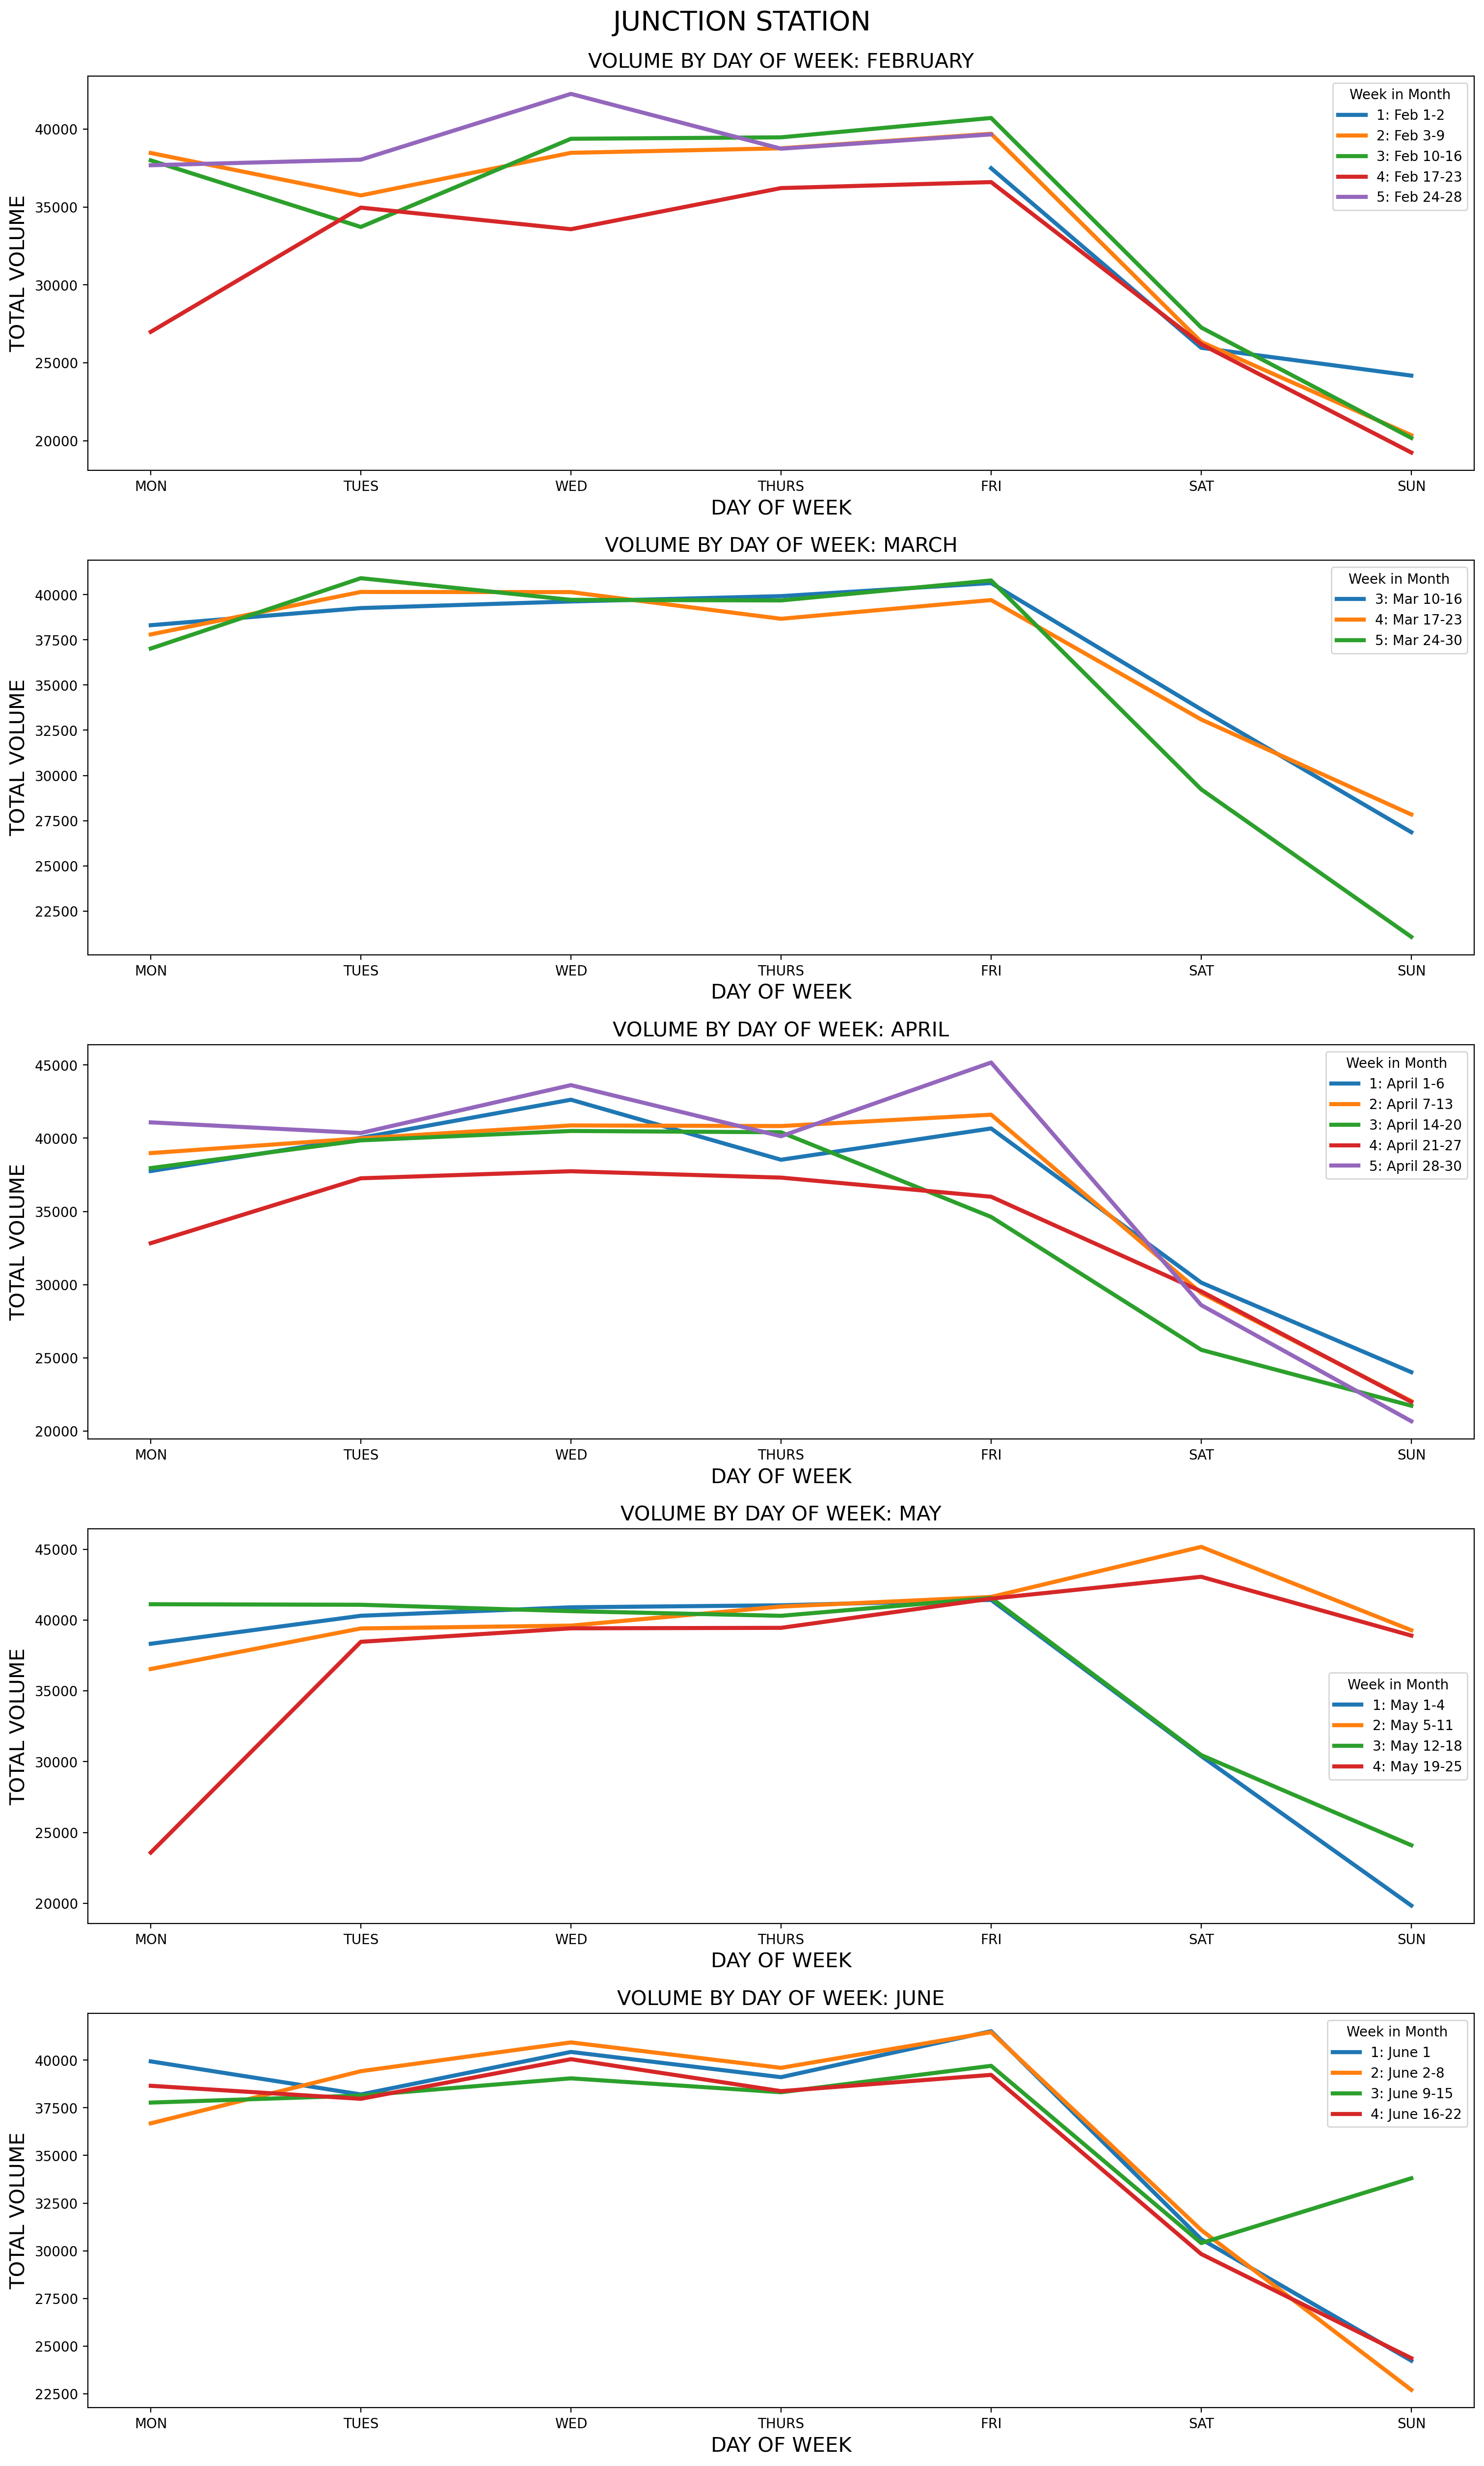

In [193]:
fig, axs = plt.subplots(5, 1, constrained_layout=True, figsize=(15, 25),dpi=200)

fig.suptitle('JUNCTION STATION',ha='center',fontsize=20)

axs[0].set_title('VOLUME BY DAY OF WEEK: FEBRUARY',ha='center',fontsize=15)
axs[1].set_title('VOLUME BY DAY OF WEEK: MARCH',ha='center',fontsize=15)
axs[2].set_title('VOLUME BY DAY OF WEEK: APRIL',ha='center',fontsize=15)
axs[3].set_title('VOLUME BY DAY OF WEEK: MAY',ha='center',fontsize=15)
axs[4].set_title('VOLUME BY DAY OF WEEK: JUNE',ha='center',fontsize=15)


for i in range(0,5):
    axs[i].set_xlabel('DAY OF WEEK', fontsize=15)
    axs[i].set_ylabel('TOTAL VOLUME',fontsize=15)
    axs[i].set_xticks([0,1,2,3,4,5,6])
    axs[i].set_xticklabels(['MON','TUES','WED','THURS','FRI','SAT','SUN'])

    
new_title = 'Week in Month'
for i, group in junction.groupby('WEEK_OF_YEAR'):
    if i in range(5,10):
        #feb week 5-9 inclusive
        sns.lineplot(ax=axs[0],x=group['WEEKDAY'],y=group['NET_BUSY'],data=junction, label=i, lw=3)
        
        leg = axs[0].get_legend()
        leg.set_title(new_title)
        new_labels = ['1: Feb 1-2', '2: Feb 3-9', '3: Feb 10-16','4: Feb 17-23','5: Feb 24-28']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)
    elif i in range(11,14):
        #march week 9-13 inclusive
        #week 9&10 are WEIRD
        sns.lineplot(ax=axs[1],x=group['WEEKDAY'],y=group['NET_BUSY'],data=junction, label=i, lw=3)
        
        leg = axs[1].get_legend()
        leg.set_title(new_title)
        new_labels = ['3: Mar 10-16','4: Mar 17-23','5: Mar 24-30', '6: Mar 31']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)

    elif i in range(14,19):
        #april week 14-18 inclusive
        sns.lineplot(ax=axs[2],x=group['WEEKDAY'],y=group['NET_BUSY'],data=junction, label=i, lw=3)
        
        leg = axs[2].get_legend()
        leg.set_title(new_title)
        new_labels = ['1: April 1-6', '2: April 7-13', '3: April 14-20','4: April 21-27','5: April 28-30']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)

    elif i in range(18,23):
        #may week 18-22 inclusive
        sns.lineplot(ax=axs[3],x=group['WEEKDAY'],y=group['NET_BUSY'],data=junction, label=i, lw=3)
        
        leg = axs[3].get_legend()
        leg.set_title(new_title)
        new_labels = ['1: May 1-4', '2: May 5-11', '3: May 12-18','4: May 19-25','5: May 26-31']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)

    elif i in range(22,27):
        #june week 22-26 inclusive
        sns.lineplot(ax=axs[4],x=group['WEEKDAY'],y=group['NET_BUSY'],data=junction, label=i, lw=3)
        
        leg = axs[4].get_legend()
        leg.set_title(new_title)
        new_labels = ['1: June 1', '2: June 2-8', '3: June 9-15','4: June 16-22','5: June 23-29', '6: June 30']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)

plt.savefig('junction_st_volumebydow.jpg')   

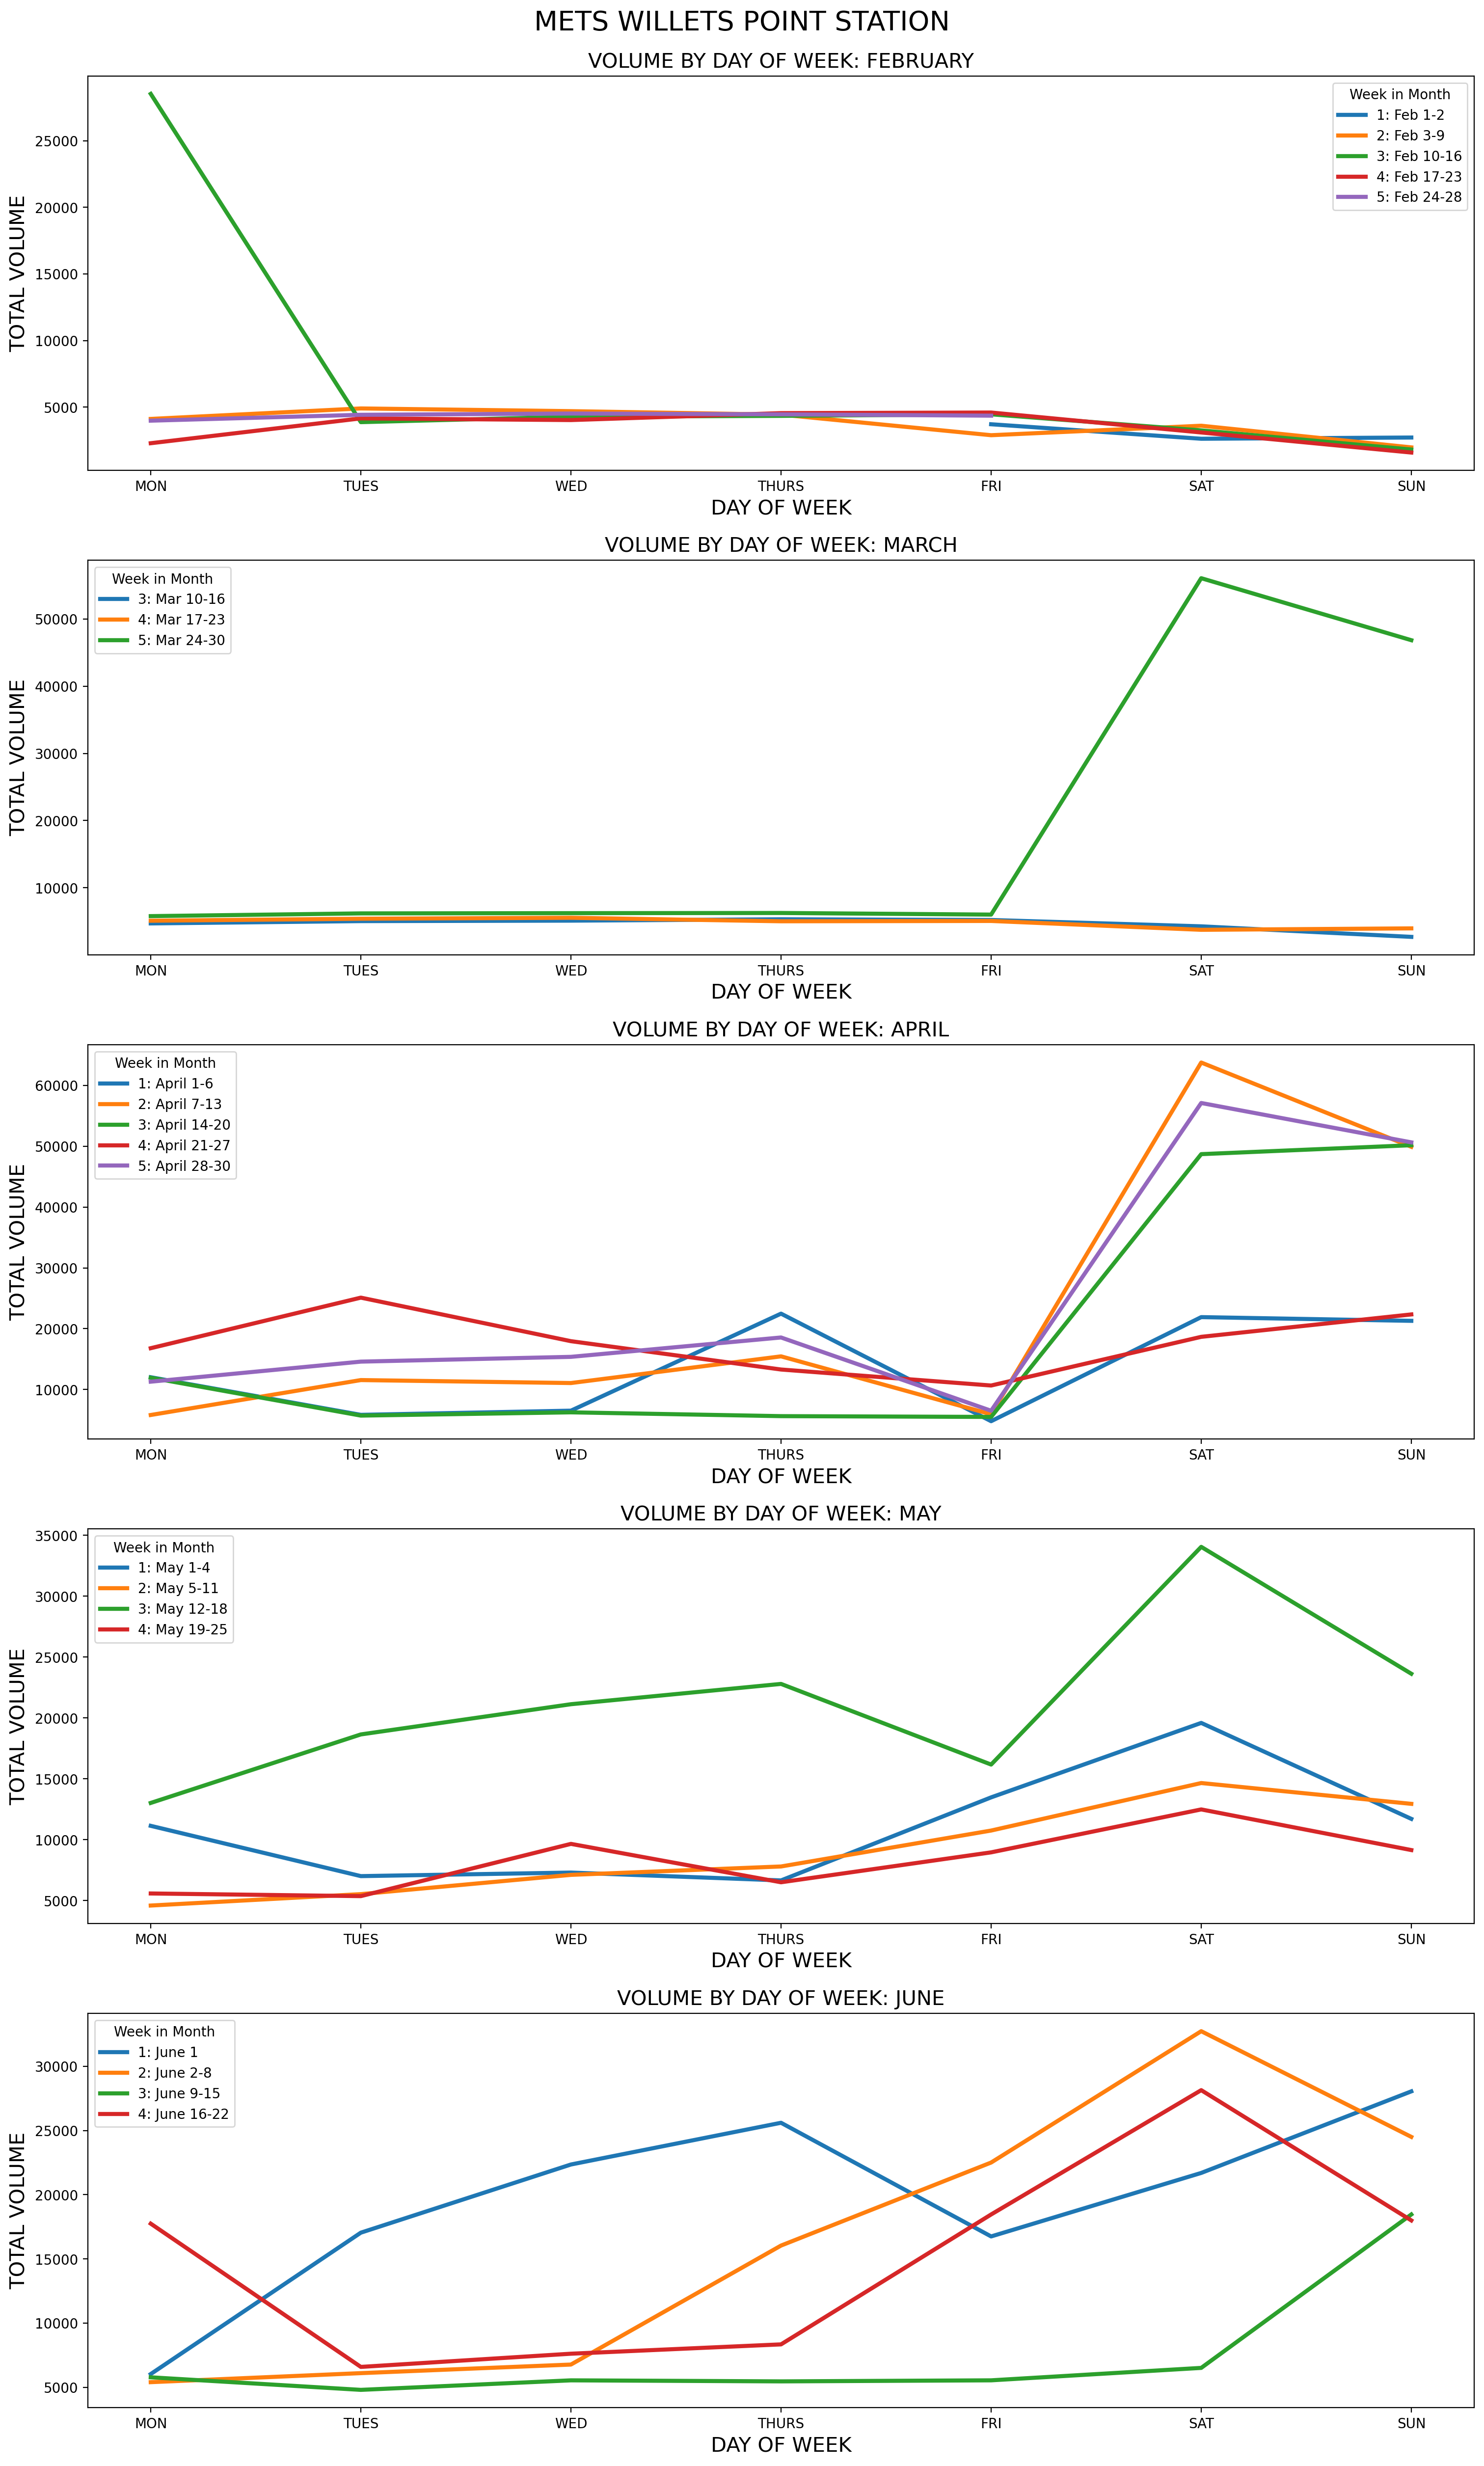

In [194]:
fig, axs = plt.subplots(5, 1, constrained_layout=True, figsize=(15, 25),dpi=200)

fig.suptitle('METS WILLETS POINT STATION',ha='center',fontsize=20)

axs[0].set_title('VOLUME BY DAY OF WEEK: FEBRUARY',ha='center',fontsize=15)
axs[1].set_title('VOLUME BY DAY OF WEEK: MARCH',ha='center',fontsize=15)
axs[2].set_title('VOLUME BY DAY OF WEEK: APRIL',ha='center',fontsize=15)
axs[3].set_title('VOLUME BY DAY OF WEEK: MAY',ha='center',fontsize=15)
axs[4].set_title('VOLUME BY DAY OF WEEK: JUNE',ha='center',fontsize=15)


for i in range(0,5):
    axs[i].set_xlabel('DAY OF WEEK', fontsize=15)
    axs[i].set_ylabel('TOTAL VOLUME',fontsize=15)
    axs[i].set_xticks([0,1,2,3,4,5,6])
    axs[i].set_xticklabels(['MON','TUES','WED','THURS','FRI','SAT','SUN'])

    
#leg = g.axes.flat[0].get_legend()
#new_title = 'My title'
#leg.set_title(new_title)
new_title = 'Week in Month'
for i, group in mets_willets.groupby('WEEK_OF_YEAR'):
    if i in range(5,10):
        #feb week 5-9 inclusive
        sns.lineplot(ax=axs[0],x=group['WEEKDAY'],y=group['NET_BUSY'],data=mets_willets, label=i, lw=3)
        
        leg = axs[0].get_legend()
        leg.set_title(new_title)
        new_labels = ['1: Feb 1-2', '2: Feb 3-9', '3: Feb 10-16','4: Feb 17-23','5: Feb 24-28']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)
            
    elif i in range(11,14):
        #march week 9-13 inclusive
        #week 9&10 are WEIRD
        sns.lineplot(ax=axs[1],x=group['WEEKDAY'],y=group['NET_BUSY'],data=mets_willets, label=i, lw=3)
        
        leg = axs[1].get_legend()
        leg.set_title(new_title)
        new_labels = ['3: Mar 10-16','4: Mar 17-23','5: Mar 24-30', '6: Mar 31']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)

    elif i in range(14,19):
        #april week 14-18 inclusive
        sns.lineplot(ax=axs[2],x=group['WEEKDAY'],y=group['NET_BUSY'],data=mets_willets, label=i, lw=3)
        
        leg = axs[2].get_legend()
        leg.set_title(new_title)
        new_labels = ['1: April 1-6', '2: April 7-13', '3: April 14-20','4: April 21-27','5: April 28-30']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)

    elif i in range(18,23):
        #may week 18-22 inclusive
        sns.lineplot(ax=axs[3],x=group['WEEKDAY'],y=group['NET_BUSY'],data=mets_willets, label=i, lw=3)
        
        leg = axs[3].get_legend()
        leg.set_title(new_title)
        new_labels = ['1: May 1-4', '2: May 5-11', '3: May 12-18','4: May 19-25','5: May 26-31']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)

    elif i in range(22,27):
        #june week 22-26 inclusive
        sns.lineplot(ax=axs[4],x=group['WEEKDAY'],y=group['NET_BUSY'],data=mets_willets, label=i, lw=3)
        
        leg = axs[4].get_legend()
        leg.set_title(new_title)
        new_labels = ['1: June 1', '2: June 2-8', '3: June 9-15','4: June 16-22','5: June 23-29', '6: June 30']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)

plt.savefig('mets_willets_st_volumebydow.jpg')

# STRANGE OCCURANCE IN FIRST 10 DAYS OF MARCH

(100.0, 300000.0)

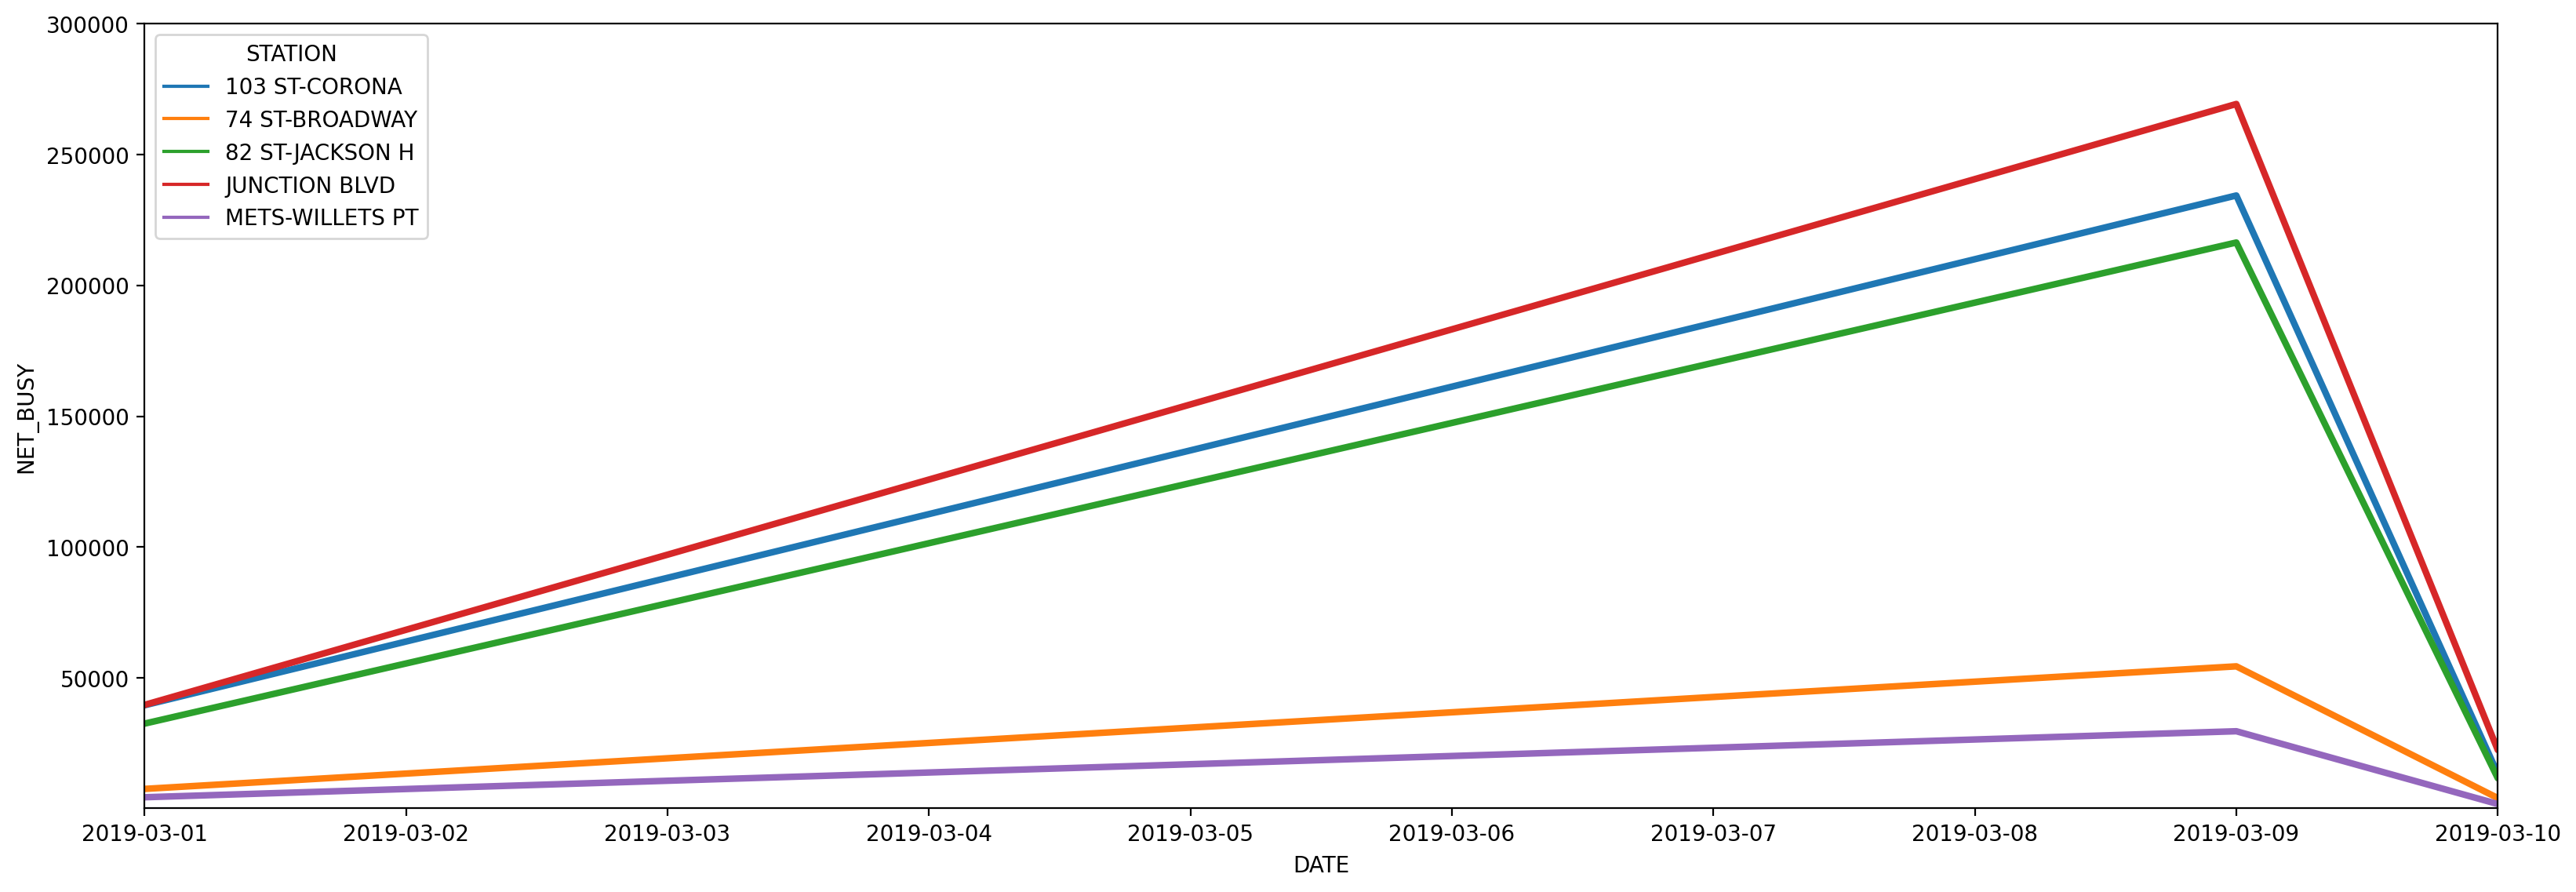

In [195]:
fig = plt.figure(figsize=(15,5),dpi=200)
axes = fig.add_axes([0,0,1,1])
sns.lineplot(x='DATE',y='NET_BUSY',data=line7, hue='STATION', lw = 3)
axes.set_xlim(np.datetime64('2019-03-01'), np.datetime64('2019-03-10'))
axes.set_ylim(100,300000)